<a href="https://colab.research.google.com/github/Jahnvi99/Posture/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
import numpy as np
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv('rra.csv')

In [ ]:
df['activity'].value_counts()

lying       36925
sitting     33151
standing    32382
Name: activity, dtype: int64

In [ ]:
df['type'].value_counts()

uh    53256
h     49202
Name: type, dtype: int64

In [ ]:
df = df[~df['knee_ax'].isnull()]
df = df[~df['knee_ay'].isnull()]
df = df[~df['knee_az'].isnull()]
df[['knee_ax']] = df[['knee_ax']].astype(int)
df[['knee_ay']] = df[['knee_ay']].astype(int)
df[['knee_az']] = df[['knee_az']].astype(int)

In [ ]:
df[['activity', 'type']].value_counts()

activity  type
lying     h       18691
          uh      18234
sitting   uh      17783
standing  uh      17100
          h       15282
sitting   h       15229
dtype: int64

In [ ]:
df['type'].value_counts()

uh    53117
h     49202
Name: type, dtype: int64

In [ ]:
df_shuffled = df.sample(frac=1)
X_shuffled = df_shuffled.drop("type", axis = 1)
y_shuffled = df_shuffled["type"]


In [ ]:
X_train, X_validation, X_test = np.split(X_shuffled, [int(0.6*len(df)),int(0.8*len(df))])
y_train, y_validation, y_test = np.split(y_shuffled, [int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
X_train.to_csv('x_train.csv')
y_train.to_csv('y_train.csv')
X_test.to_csv('x_test.csv')
y_test.to_csv('y_test.csv')
X_validation.to_csv('x_validation.csv')
y_validation.to_csv('y_validation.csv')

In [ ]:
y_train.value_counts()

uh    31880
h     29511
Name: type, dtype: int64

In [ ]:
X_train.head(10)

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,activity
37781,1572,-16220,-3168,-1040.0,37.0,361.0,-184,13880,7212,688,-208,-48,4160,16232,-1840,16,-370,157,standing
87956,14620,4756,-6728,-480.0,181.0,147.0,15740,-3228,4172,256,-207,263,-15612,-1236,-800,512,-463,-422,lying
69997,-968,3920,-16584,-656.0,279.0,293.0,4516,-9160,11644,1472,-235,107,752,112,-17568,192,-212,210,lying
66757,-3756,5120,-15904,-576.0,33.0,269.0,-7364,2228,12920,1376,-272,24,3656,2068,-17404,592,-223,200,lying
38278,1632,-16140,-3424,-976.0,37.0,162.0,-44,13844,7656,736,-139,-19,4152,16252,-1936,32,-302,221,standing
89358,15676,4004,-4768,-544.0,57.0,315.0,14244,-2128,7232,176,-210,171,-14860,-292,4532,288,-321,259,lying
84959,15996,3056,-4484,-96.0,27.0,302.0,14908,760,6168,768,-219,88,-15328,-2428,-4360,736,-193,164,lying
86865,32767,32767,-12364,160.0,-33.0,271.0,15256,1980,5332,768,-259,7,-15276,656,3108,752,-337,53,lying
80941,-52,6864,-15492,-320.0,20.0,347.0,7788,-3208,13120,368,-307,-1,-5860,-588,-16488,272,-499,68,lying
74268,-2120,8140,-14808,-512.0,37.0,294.0,11804,-4508,9740,880,-259,175,1684,-112,-17664,-64,-145,202,lying


In [ ]:
df_xtrain = pd.read_csv('x_train.csv',index_col=0)

In [ ]:
df_xtrain.head(10)

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,activity
37781,1572,-16220,-3168,-1040.0,37.0,361.0,-184,13880,7212,688,-208,-48,4160,16232,-1840,16,-370,157,standing
87956,14620,4756,-6728,-480.0,181.0,147.0,15740,-3228,4172,256,-207,263,-15612,-1236,-800,512,-463,-422,lying
69997,-968,3920,-16584,-656.0,279.0,293.0,4516,-9160,11644,1472,-235,107,752,112,-17568,192,-212,210,lying
66757,-3756,5120,-15904,-576.0,33.0,269.0,-7364,2228,12920,1376,-272,24,3656,2068,-17404,592,-223,200,lying
38278,1632,-16140,-3424,-976.0,37.0,162.0,-44,13844,7656,736,-139,-19,4152,16252,-1936,32,-302,221,standing
89358,15676,4004,-4768,-544.0,57.0,315.0,14244,-2128,7232,176,-210,171,-14860,-292,4532,288,-321,259,lying
84959,15996,3056,-4484,-96.0,27.0,302.0,14908,760,6168,768,-219,88,-15328,-2428,-4360,736,-193,164,lying
86865,32767,32767,-12364,160.0,-33.0,271.0,15256,1980,5332,768,-259,7,-15276,656,3108,752,-337,53,lying
80941,-52,6864,-15492,-320.0,20.0,347.0,7788,-3208,13120,368,-307,-1,-5860,-588,-16488,272,-499,68,lying
74268,-2120,8140,-14808,-512.0,37.0,294.0,11804,-4508,9740,880,-259,175,1684,-112,-17664,-64,-145,202,lying


In [ ]:
y_validation.value_counts()

uh    10631
h      9833
Name: type, dtype: int64

In [ ]:
y_test.value_counts()

uh    10606
h      9858
Name: type, dtype: int64

In [ ]:
X_train.head()

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,activity
89739,15384,2796,-6128,-480.0,-94.0,136.0,14972,-3500,5400,144,-211,131,-15892,588,-768,512,532,538,lying
8,-2552,-2192,-17052,-688.0,323.0,303.0,1444,15540,4548,-720,-51,423,5140,15896,468,-496,-645,31,sitting
38843,1596,-16044,-3380,-1008.0,83.0,300.0,-108,14092,7168,656,-255,-43,4212,16380,-2108,16,-43,224,standing
92015,16384,-1972,-2796,-208.0,53.0,262.0,14068,2168,-10548,448,-238,60,-14428,1856,5400,416,-376,59,lying
99922,16380,-1396,-3472,-464.0,20.0,281.0,15404,2632,-7772,464,-266,75,-14808,688,4416,448,-359,195,lying


In [ ]:
y_train.head()

89739    uh
8         h
38843     h
92015    uh
99922    uh
Name: type, dtype: object

In [ ]:
X_test.head()

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,activity
35112,1708,-16248,-3200,-864.0,-20.0,194.0,472,13820,7592,592,-246,126,3676,16320,-2000,-144,-172,130,standing
79355,-3548,5080,-15940,-624.0,38.0,290.0,-7508,2156,12840,1264,-211,71,3692,2124,-17308,624,-287,129,lying
42250,596,-16416,-1536,-880.0,-69.0,747.0,4776,15908,-1324,288,-237,514,-1476,15856,-3808,320,-503,-2176,standing
7816,-4680,-1524,-16376,-1312.0,80.0,263.0,328,14600,6280,-16,-219,64,3116,16280,-3348,-208,-162,219,sitting
32599,0,9216,520,-3072.0,1.0,0.0,8192,9472,512,-3072,80,0,8192,9216,1024,-3072,-492,0,sitting


In [ ]:
y_test.head()

35112     h
79355     h
42250     h
7816      h
32599    uh
Name: type, dtype: object

In [ ]:
X_validation.head()

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,activity
77057,408,7908,-14992,-272.0,14.0,262.0,9752,-5012,11356,1520,-255,145,1900,-756,-17696,144,-345,240,lying
81142,100,7056,-15908,-192.0,11.0,162.0,7324,-3344,13148,768,-193,-462,-3668,-584,-17188,432,-470,244,lying
22827,-14720,-3100,-6868,-1264.0,-55.0,343.0,188,16272,416,368,-184,-43,4264,15272,4876,144,71,-91,sitting
20608,-14544,-3052,-7164,-1216.0,-20.0,603.0,1032,16216,452,336,-219,53,2476,14956,5948,48,-493,479,sitting
33407,2324,-16176,-2636,-736.0,49.0,268.0,960,14276,6656,640,-229,180,3684,16304,-2760,-80,-118,371,standing


In [ ]:
y_validation.head()

60970    uh
62928    uh
76736     h
46305     h
69632     h
Name: type, dtype: object

In [ ]:
X_train = pd.read_csv('x_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
X_test = pd.read_csv('x_test.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)
X_validation = pd.read_csv('x_validation.csv', index_col=0)
y_validation = pd.read_csv('y_validation.csv', index_col=0)

In [ ]:
X_train.head()

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,activity
37781,1572,-16220,-3168,-1040.0,37.0,361.0,-184,13880,7212,688,-208,-48,4160,16232,-1840,16,-370,157,standing
87956,14620,4756,-6728,-480.0,181.0,147.0,15740,-3228,4172,256,-207,263,-15612,-1236,-800,512,-463,-422,lying
69997,-968,3920,-16584,-656.0,279.0,293.0,4516,-9160,11644,1472,-235,107,752,112,-17568,192,-212,210,lying
66757,-3756,5120,-15904,-576.0,33.0,269.0,-7364,2228,12920,1376,-272,24,3656,2068,-17404,592,-223,200,lying
38278,1632,-16140,-3424,-976.0,37.0,162.0,-44,13844,7656,736,-139,-19,4152,16252,-1936,32,-302,221,standing


In [ ]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
X_validation.reset_index(drop=True,inplace=True)
y_validation.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [ ]:
X_train.head(10)

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,activity
0,1572,-16220,-3168,-1040.0,37.0,361.0,-184,13880,7212,688,-208,-48,4160,16232,-1840,16,-370,157,standing
1,14620,4756,-6728,-480.0,181.0,147.0,15740,-3228,4172,256,-207,263,-15612,-1236,-800,512,-463,-422,lying
2,-968,3920,-16584,-656.0,279.0,293.0,4516,-9160,11644,1472,-235,107,752,112,-17568,192,-212,210,lying
3,-3756,5120,-15904,-576.0,33.0,269.0,-7364,2228,12920,1376,-272,24,3656,2068,-17404,592,-223,200,lying
4,1632,-16140,-3424,-976.0,37.0,162.0,-44,13844,7656,736,-139,-19,4152,16252,-1936,32,-302,221,standing
5,15676,4004,-4768,-544.0,57.0,315.0,14244,-2128,7232,176,-210,171,-14860,-292,4532,288,-321,259,lying
6,15996,3056,-4484,-96.0,27.0,302.0,14908,760,6168,768,-219,88,-15328,-2428,-4360,736,-193,164,lying
7,32767,32767,-12364,160.0,-33.0,271.0,15256,1980,5332,768,-259,7,-15276,656,3108,752,-337,53,lying
8,-52,6864,-15492,-320.0,20.0,347.0,7788,-3208,13120,368,-307,-1,-5860,-588,-16488,272,-499,68,lying
9,-2120,8140,-14808,-512.0,37.0,294.0,11804,-4508,9740,880,-259,175,1684,-112,-17664,-64,-145,202,lying


In [ ]:
y_train.head(10)

,type
0,0
1,1
2,0
3,0
4,0
5,1
6,1
7,1
8,0
9,0


In [ ]:
X_train_acc = X_train[['knee_ax', 'knee_ay','knee_az','back_ax','back_ay','back_az','chest_ax','chest_ay','chest_az','activity']]
X_test_acc = X_test[['knee_ax', 'knee_ay','knee_az','back_ax','back_ay','back_az','chest_ax','chest_ay','chest_az','activity']]
X_validation_acc = X_validation[['knee_ax', 'knee_ay','knee_az','back_ax','back_ay','back_az','chest_ax','chest_ay','chest_az','activity']]

In [ ]:
X_train_gyro = X_train[['knee_gx', 'knee_gy','knee_gz','back_gx','back_gy','back_gz','chest_gx','chest_gy','chest_gz','activity']]
X_validation_gyro = X_validation[['knee_gx', 'knee_gy','knee_gz','back_gx','back_gy','back_gz','chest_gx','chest_gy','chest_gz','activity']]
X_test_gyro = X_test[['knee_gx', 'knee_gy','knee_gz','back_gx','back_gy','back_gz','chest_gx','chest_gy','chest_gz','activity']]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
import pickle
pickle.dump(sc, open('scaler.pkl','wb'))

column_names_to_normalize = ['knee_ax','knee_ay','knee_az','knee_gx','knee_gy','knee_gz','back_ax', 'back_ay', 'back_az', 'back_gx', 'back_gy','back_gz', 'chest_ax','chest_ay','chest_az','chest_gx','chest_gy','chest_gz']
x = X_train[column_names_to_normalize].values
sc.fit(x)
pickle.dump(sc, open('scaler.pkl','wb'))
x_scaled = sc.transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = X_train.index)
X_train[column_names_to_normalize] = df_temp
X_train.head(10)

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,activity
0,0.075888,-1.329637,1.100935,-0.499101,-0.097252,0.052144,-0.847512,0.598053,0.725791,0.391227,0.029474,-0.312622,0.777022,0.971062,-0.153830,-0.028845,-0.237909,-0.005396,standing
1,1.458939,0.891488,0.462348,0.374207,0.240045,-0.303511,1.835088,-1.362046,0.305848,-0.213966,0.032209,0.521833,-2.175210,-1.190542,-0.045219,0.697166,-0.395983,-0.976248,lying
2,-0.193344,0.802965,-1.305604,0.099739,0.469594,-0.060868,-0.055737,-2.041687,1.338023,1.489539,-0.044385,0.103264,0.268161,-1.023731,-1.796361,0.228772,0.030648,0.083473,lying
3,-0.488864,0.930032,-1.183627,0.224497,-0.106621,-0.100754,-2.057074,-0.736941,1.514289,1.355052,-0.145598,-0.119436,0.701768,-0.781683,-1.779234,0.814264,0.011951,0.066705,lying
4,0.082248,-1.321166,1.055014,-0.399294,-0.097252,-0.278582,-0.823927,0.593928,0.787125,0.458470,0.218223,-0.234811,0.775828,0.973537,-0.163856,-0.005425,-0.122327,0.101917,standing
5,1.570872,0.811860,0.813930,0.274401,-0.050405,-0.024305,1.583068,-1.236017,0.728554,-0.326039,0.024003,0.274985,-2.062926,-1.073725,0.511620,0.369290,-0.154622,0.165634,lying
6,1.604791,0.711477,0.864873,0.973047,-0.120676,-0.045910,1.694927,-0.905133,0.581574,0.503299,-0.000617,0.052284,-2.132804,-1.338047,-0.417003,1.025042,0.062943,0.006341,lying
7,3.382469,3.857542,-0.548628,1.372273,-0.261216,-0.097430,1.753552,-0.765355,0.466090,0.503299,-0.110037,-0.165050,-2.125040,-0.956413,0.362907,1.048461,-0.181818,-0.179781,lying
8,-0.096251,1.114702,-1.109723,0.623724,-0.137072,0.028877,0.495473,-1.359755,1.541917,-0.057064,-0.241341,-0.186515,-0.719102,-1.110354,-1.683573,0.345870,-0.457174,-0.154629,lying
9,-0.315453,1.249816,-0.987028,0.324304,-0.097252,-0.059206,1.172019,-1.508698,1.075007,0.660201,-0.110037,0.285717,0.407321,-1.051451,-1.806387,-0.145944,0.144530,0.070058,lying


In [ ]:
column_names_to_normalize = ['knee_ax','knee_ay','knee_az','knee_gx','knee_gy','knee_gz','back_ax', 'back_ay', 'back_az', 'back_gx', 'back_gy','back_gz', 'chest_ax','chest_ay','chest_az','chest_gx','chest_gy','chest_gz']
x = X_test[column_names_to_normalize].values
x_scaled = sc.transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = X_test.index)
X_test[column_names_to_normalize] = df_temp
X_test.head()

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,activity
0,-0.140346,0.850403,-1.283361,0.099739,-0.193288,-0.148951,-0.063149,-2.042604,1.375045,1.646441,-0.071740,-0.111387,0.223367,-1.007397,-1.810982,0.275611,-0.100231,0.237736,lying
1,-0.606733,0.054119,-1.206587,-1.572022,-0.048063,-0.069177,-0.732283,0.741039,0.421885,-0.527770,-0.090888,-0.068457,0.701768,0.973042,-0.320506,-0.520659,0.044246,0.054967,sitting
2,1.609031,0.292581,0.779489,0.299352,-0.083198,-0.074163,1.849239,-0.708527,-1.252913,-0.438111,-0.079946,-0.073823,-2.187752,-1.116294,0.058796,0.322450,-0.095132,0.039876,lying
3,-0.172993,-1.349120,1.268116,-0.798520,-0.151126,0.045497,-0.678375,0.748371,0.399230,0.727445,-0.006088,-0.012111,0.495715,0.980467,-0.159261,0.369290,0.064642,0.269594,standing
4,1.651430,0.140524,1.236545,0.648675,-0.111306,-0.122359,1.633607,-0.708069,-1.566764,-0.213966,-0.014294,0.009354,-1.758326,-1.104909,0.941469,0.650326,-0.079834,0.108624,lying


In [ ]:
column_names_to_normalize = ['knee_ax','knee_ay','knee_az','knee_gx','knee_gy','knee_gz','back_ax', 'back_ay', 'back_az', 'back_gx', 'back_gy','back_gz', 'chest_ax','chest_ay','chest_az','chest_gx','chest_gy','chest_gz']
x = X_validation[column_names_to_normalize].values
x_scaled = sc.transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = X_validation.index)
X_validation[column_names_to_normalize] = df_temp
X_validation.head()

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,activity
0,-0.047492,1.225250,-1.020034,0.698579,-0.151126,-0.112388,0.826333,-1.566443,1.298239,1.556783,-0.099095,0.205223,0.439573,-1.131143,-1.809729,0.158513,-0.195416,0.133776,lying
1,-0.080139,1.135033,-1.184345,0.823337,-0.158153,-0.278582,0.417306,-1.375336,1.545785,0.503299,0.070506,-1.423440,-0.391806,-1.109859,-1.756676,0.580067,-0.407882,0.140483,lying
2,-1.651017,0.059625,0.437235,-0.848424,-0.312747,0.022229,-0.784844,0.872109,-0.213002,-0.057064,0.095126,-0.299206,0.792551,0.852265,0.547545,0.158513,0.511671,-0.421236,sitting
3,-1.632361,0.064708,0.384140,-0.773569,-0.230765,0.454334,-0.642661,0.865693,-0.208029,-0.101893,-0.000617,-0.041625,0.525578,0.813161,0.659498,0.017994,-0.446975,0.534525,sitting
4,0.155598,-1.324978,1.196365,-0.025019,-0.069144,-0.102416,-0.654790,0.643423,0.648986,0.323983,-0.027972,0.299133,0.705949,0.979972,-0.249909,-0.169363,0.190422,0.353433,standing


In [ ]:
le = LabelEncoder() 
le.fit(X_train['activity']) 
X_train['activity']=le.transform(X_train['activity'])
X_test['activity']=le.transform(X_test['activity'])
X_validation['activity']=le.transform(X_validation['activity'])

In [ ]:
X_train.head()

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,activity
0,0.075888,-1.329637,1.100935,-0.499101,-0.097252,0.052144,-0.847512,0.598053,0.725791,0.391227,0.029474,-0.312622,0.777022,0.971062,-0.153830,-0.028845,-0.237909,-0.005396,2
1,1.458939,0.891488,0.462348,0.374207,0.240045,-0.303511,1.835088,-1.362046,0.305848,-0.213966,0.032209,0.521833,-2.175210,-1.190542,-0.045219,0.697166,-0.395983,-0.976248,0
2,-0.193344,0.802965,-1.305604,0.099739,0.469594,-0.060868,-0.055737,-2.041687,1.338023,1.489539,-0.044385,0.103264,0.268161,-1.023731,-1.796361,0.228772,0.030648,0.083473,0
3,-0.488864,0.930032,-1.183627,0.224497,-0.106621,-0.100754,-2.057074,-0.736941,1.514289,1.355052,-0.145598,-0.119436,0.701768,-0.781683,-1.779234,0.814264,0.011951,0.066705,0
4,0.082248,-1.321166,1.055014,-0.399294,-0.097252,-0.278582,-0.823927,0.593928,0.787125,0.458470,0.218223,-0.234811,0.775828,0.973537,-0.163856,-0.005425,-0.122327,0.101917,2


In [ ]:
y_train.head()

,type
0,h
1,uh
2,h
3,h
4,h


In [ ]:
X_test.head()

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,activity
0,-0.140346,0.850403,-1.283361,0.099739,-0.193288,-0.148951,-0.063149,-2.042604,1.375045,1.646441,-0.071740,-0.111387,0.223367,-1.007397,-1.810982,0.275611,-0.100231,0.237736,0
1,-0.606733,0.054119,-1.206587,-1.572022,-0.048063,-0.069177,-0.732283,0.741039,0.421885,-0.527770,-0.090888,-0.068457,0.701768,0.973042,-0.320506,-0.520659,0.044246,0.054967,1
2,1.609031,0.292581,0.779489,0.299352,-0.083198,-0.074163,1.849239,-0.708527,-1.252913,-0.438111,-0.079946,-0.073823,-2.187752,-1.116294,0.058796,0.322450,-0.095132,0.039876,0
3,-0.172993,-1.349120,1.268116,-0.798520,-0.151126,0.045497,-0.678375,0.748371,0.399230,0.727445,-0.006088,-0.012111,0.495715,0.980467,-0.159261,0.369290,0.064642,0.269594,2
4,1.651430,0.140524,1.236545,0.648675,-0.111306,-0.122359,1.633607,-0.708069,-1.566764,-0.213966,-0.014294,0.009354,-1.758326,-1.104909,0.941469,0.650326,-0.079834,0.108624,0


In [ ]:
X_validation.head()

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,activity
0,-0.047492,1.225250,-1.020034,0.698579,-0.151126,-0.112388,0.826333,-1.566443,1.298239,1.556783,-0.099095,0.205223,0.439573,-1.131143,-1.809729,0.158513,-0.195416,0.133776,0
1,-0.080139,1.135033,-1.184345,0.823337,-0.158153,-0.278582,0.417306,-1.375336,1.545785,0.503299,0.070506,-1.423440,-0.391806,-1.109859,-1.756676,0.580067,-0.407882,0.140483,0
2,-1.651017,0.059625,0.437235,-0.848424,-0.312747,0.022229,-0.784844,0.872109,-0.213002,-0.057064,0.095126,-0.299206,0.792551,0.852265,0.547545,0.158513,0.511671,-0.421236,1
3,-1.632361,0.064708,0.384140,-0.773569,-0.230765,0.454334,-0.642661,0.865693,-0.208029,-0.101893,-0.000617,-0.041625,0.525578,0.813161,0.659498,0.017994,-0.446975,0.534525,1
4,0.155598,-1.324978,1.196365,-0.025019,-0.069144,-0.102416,-0.654790,0.643423,0.648986,0.323983,-0.027972,0.299133,0.705949,0.979972,-0.249909,-0.169363,0.190422,0.353433,2


In [ ]:
enc=OneHotEncoder()
enc.fit(X_train.activity.values.reshape(-1,1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
enc_trdf=pd.DataFrame(enc.transform(X_train.activity.values.reshape(-1,1)).toarray())

In [ ]:
X_train=X_train.iloc[:,0:18].join(enc_trdf)

In [ ]:
X_train.head(10)

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,0,1,2
0,0.075888,-1.329637,1.100935,-0.499101,-0.097252,0.052144,-0.847512,0.598053,0.725791,0.391227,0.029474,-0.312622,0.777022,0.971062,-0.153830,-0.028845,-0.237909,-0.005396,0.0,0.0,1.0
1,1.458939,0.891488,0.462348,0.374207,0.240045,-0.303511,1.835088,-1.362046,0.305848,-0.213966,0.032209,0.521833,-2.175210,-1.190542,-0.045219,0.697166,-0.395983,-0.976248,1.0,0.0,0.0
2,-0.193344,0.802965,-1.305604,0.099739,0.469594,-0.060868,-0.055737,-2.041687,1.338023,1.489539,-0.044385,0.103264,0.268161,-1.023731,-1.796361,0.228772,0.030648,0.083473,1.0,0.0,0.0
3,-0.488864,0.930032,-1.183627,0.224497,-0.106621,-0.100754,-2.057074,-0.736941,1.514289,1.355052,-0.145598,-0.119436,0.701768,-0.781683,-1.779234,0.814264,0.011951,0.066705,1.0,0.0,0.0
4,0.082248,-1.321166,1.055014,-0.399294,-0.097252,-0.278582,-0.823927,0.593928,0.787125,0.458470,0.218223,-0.234811,0.775828,0.973537,-0.163856,-0.005425,-0.122327,0.101917,0.0,0.0,1.0
5,1.570872,0.811860,0.813930,0.274401,-0.050405,-0.024305,1.583068,-1.236017,0.728554,-0.326039,0.024003,0.274985,-2.062926,-1.073725,0.511620,0.369290,-0.154622,0.165634,1.0,0.0,0.0
6,1.604791,0.711477,0.864873,0.973047,-0.120676,-0.045910,1.694927,-0.905133,0.581574,0.503299,-0.000617,0.052284,-2.132804,-1.338047,-0.417003,1.025042,0.062943,0.006341,1.0,0.0,0.0
7,3.382469,3.857542,-0.548628,1.372273,-0.261216,-0.097430,1.753552,-0.765355,0.466090,0.503299,-0.110037,-0.165050,-2.125040,-0.956413,0.362907,1.048461,-0.181818,-0.179781,1.0,0.0,0.0
8,-0.096251,1.114702,-1.109723,0.623724,-0.137072,0.028877,0.495473,-1.359755,1.541917,-0.057064,-0.241341,-0.186515,-0.719102,-1.110354,-1.683573,0.345870,-0.457174,-0.154629,1.0,0.0,0.0
9,-0.315453,1.249816,-0.987028,0.324304,-0.097252,-0.059206,1.172019,-1.508698,1.075007,0.660201,-0.110037,0.285717,0.407321,-1.051451,-1.806387,-0.145944,0.144530,0.070058,1.0,0.0,0.0


In [ ]:
X_train.rename(columns={0:'lying',1:'sitting',2:'standing'},inplace=True)

In [ ]:
enc_tedf=pd.DataFrame(enc.transform(X_test.activity.values.reshape(-1,1)).toarray())
X_test=X_test.iloc[:,0:18].join(enc_tedf)
X_test.rename(columns={0:'lying',1:'sitting',2:'standing'},inplace=True)
X_test.head()

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,lying,sitting,standing
0,-0.140346,0.850403,-1.283361,0.099739,-0.193288,-0.148951,-0.063149,-2.042604,1.375045,1.646441,-0.071740,-0.111387,0.223367,-1.007397,-1.810982,0.275611,-0.100231,0.237736,1.0,0.0,0.0
1,-0.606733,0.054119,-1.206587,-1.572022,-0.048063,-0.069177,-0.732283,0.741039,0.421885,-0.527770,-0.090888,-0.068457,0.701768,0.973042,-0.320506,-0.520659,0.044246,0.054967,0.0,1.0,0.0
2,1.609031,0.292581,0.779489,0.299352,-0.083198,-0.074163,1.849239,-0.708527,-1.252913,-0.438111,-0.079946,-0.073823,-2.187752,-1.116294,0.058796,0.322450,-0.095132,0.039876,1.0,0.0,0.0
3,-0.172993,-1.349120,1.268116,-0.798520,-0.151126,0.045497,-0.678375,0.748371,0.399230,0.727445,-0.006088,-0.012111,0.495715,0.980467,-0.159261,0.369290,0.064642,0.269594,0.0,0.0,1.0
4,1.651430,0.140524,1.236545,0.648675,-0.111306,-0.122359,1.633607,-0.708069,-1.566764,-0.213966,-0.014294,0.009354,-1.758326,-1.104909,0.941469,0.650326,-0.079834,0.108624,1.0,0.0,0.0


In [ ]:
enc_vddf=pd.DataFrame(enc.transform(X_validation.activity.values.reshape(-1,1)).toarray())
X_validation=X_validation.iloc[:,0:18].join(enc_vddf)
X_validation.rename(columns={0:'lying',1:'sitting',2:'standing'},inplace=True)
X_validation.head()

,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,lying,sitting,standing
0,-0.047492,1.225250,-1.020034,0.698579,-0.151126,-0.112388,0.826333,-1.566443,1.298239,1.556783,-0.099095,0.205223,0.439573,-1.131143,-1.809729,0.158513,-0.195416,0.133776,1.0,0.0,0.0
1,-0.080139,1.135033,-1.184345,0.823337,-0.158153,-0.278582,0.417306,-1.375336,1.545785,0.503299,0.070506,-1.423440,-0.391806,-1.109859,-1.756676,0.580067,-0.407882,0.140483,1.0,0.0,0.0
2,-1.651017,0.059625,0.437235,-0.848424,-0.312747,0.022229,-0.784844,0.872109,-0.213002,-0.057064,0.095126,-0.299206,0.792551,0.852265,0.547545,0.158513,0.511671,-0.421236,0.0,1.0,0.0
3,-1.632361,0.064708,0.384140,-0.773569,-0.230765,0.454334,-0.642661,0.865693,-0.208029,-0.101893,-0.000617,-0.041625,0.525578,0.813161,0.659498,0.017994,-0.446975,0.534525,0.0,1.0,0.0
4,0.155598,-1.324978,1.196365,-0.025019,-0.069144,-0.102416,-0.654790,0.643423,0.648986,0.323983,-0.027972,0.299133,0.705949,0.979972,-0.249909,-0.169363,0.190422,0.353433,0.0,0.0,1.0


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim = 21, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


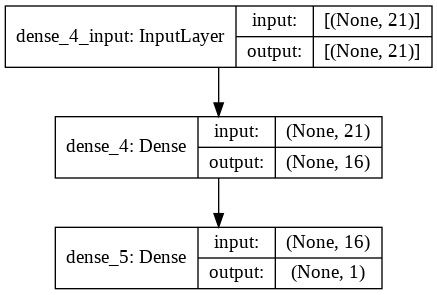

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True,to_file = 'model_structure.png')


Epoch 1/50
960/960 [==============================] - 3s 3ms/step - loss: 0.2965 - accuracy: 0.8951 - val_loss: 0.0536 - val_accuracy: 0.9913
Epoch 2/50
960/960 [==============================] - 2s 2ms/step - loss: 0.0425 - accuracy: 0.9914 - val_loss: 0.0225 - val_accuracy: 0.9957
Epoch 3/50
960/960 [==============================] - 2s 2ms/step - loss: 0.0196 - accuracy: 0.9963 - val_loss: 0.0148 - val_accuracy: 0.9973
Epoch 4/50
960/960 [==============================] - 2s 2ms/step - loss: 0.0129 - accuracy: 0.9975 - val_loss: 0.0106 - val_accuracy: 0.9978
Epoch 5/50
960/960 [==============================] - 2s 2ms/step - loss: 0.0090 - accuracy: 0.9983 - val_loss: 0.0085 - val_accuracy: 0.9984
Epoch 6/50
960/960 [==============================] - 2s 2ms/step - loss: 0.0070 - accuracy: 0.9989 - val_loss: 0.0073 - val_accuracy: 0.9984
Epoch 7/50
960/960 [==============================] - 2s 2ms/step - loss: 0.0057 - accuracy: 0.9989 - val_loss: 0.0066 - val_accuracy: 0.9985
Epoch 

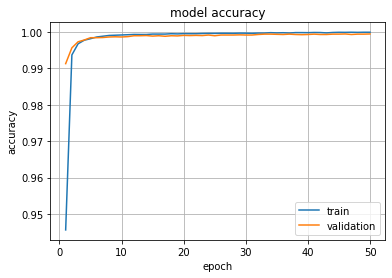

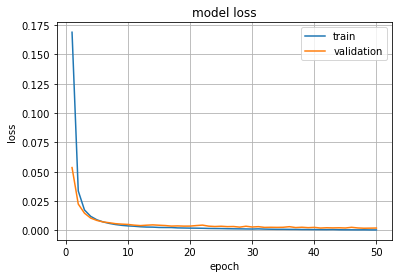

In [ ]:
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs = 50, batch_size = 64)
training_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count,history.history['accuracy'])
plt.plot(epoch_count,history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid(True)
plt.savefig('accuracy.png')
plt.show()
plt.plot(epoch_count,history.history['loss'])
plt.plot(epoch_count,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid(True)
plt.savefig('loss.png')
plt.show()

In [ ]:
y_train.replace('uh',1,inplace = True)
y_train.replace('h',0,inplace = True)
y_validation.replace('uh',1,inplace = True)
y_validation.replace('h',0,inplace = True)
y_test.replace('uh',1,inplace = True)
y_test.replace('h',0,inplace = True)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_bool =(y_pred>0.5)
list(y_pred_bool)
y_pred_bool

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

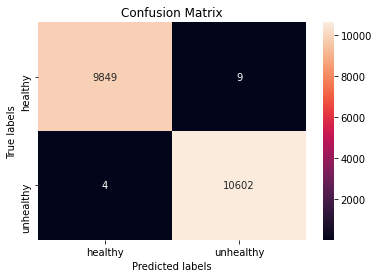

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred_bool)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['healthy', 'unhealthy']); ax.yaxis.set_ticklabels(['healthy', 'unhealthy']);
plt.savefig('confusion_matrix1.png')

In [ ]:
import tensorflow as tf
m = tf.keras.metrics.binary_accuracy(y_validation,y_pred,threshold = 0.5)

In [ ]:
print(m)

tf.Tensor([1. 1. 1. ... 1. 1. 0.], shape=(20464,), dtype=float32)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9858
           1       1.00      1.00      1.00     10606

    accuracy                           1.00     20464
   macro avg       1.00      1.00      1.00     20464
weighted avg       1.00      1.00      1.00     20464



In [ ]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(y_test, y_pred)
print(m.result().numpy())

0.99936473


In [ ]:
model.save('classifier_h.h5')

In [ ]:
from tensorflow import keras
cla = keras.models.load_model('classifier')

In [ ]:
cla.predict(X_test)

array([[1.2951255e-12],
       [7.8972525e-19],
       [1.0000000e+00],
       ...,
       [4.5950791e-12],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [ ]:
q = model.predict( np.array( [X_test.iloc[1],] )  )

In [ ]:
if(q <= 0.5):
  q = 0
else :
  q = 1  

In [ ]:
y_test.iloc[1]

type    0
Name: 1, dtype: int64

In [ ]:
q

0

In [ ]:
def check_health(knee_ax, knee_ay, knee_az, knee_gx, knee_gy, knee_gz, back_ax, back_ay, back_az, back_gx, back_gy, back_gz, chest_ax, chest_ay, chest_az, chest_gx, chest_gy, chest_gz, lying, sitting, standing):

  import pandas as pd
  from tensorflow import keras
  import pickle
  import numpy as np

  cols = ['knee_ax','knee_ay','knee_az','knee_gx','knee_gy','knee_gz','back_ax', 'back_ay', 'back_az', 'back_gx', 'back_gy','back_gz', 'chest_ax','chest_ay','chest_az','chest_gx','chest_gy','chest_gz','lying','sitting','standing']
  df= pd.DataFrame([[knee_ax, knee_ay, knee_az, knee_gx, knee_gy, knee_gz, back_ax, back_ay, back_az, back_gx, back_gy, back_gz, chest_ax, chest_ay, chest_az, chest_gx, chest_gy, chest_gz, lying, sitting, standing]], columns = cols)
  print(df.head())
  sc = pickle.load(open('scaler.pkl','rb'))
  column_names_to_normalize = ['knee_ax','knee_ay','knee_az','knee_gx','knee_gy','knee_gz','back_ax', 'back_ay', 'back_az', 'back_gx', 'back_gy','back_gz', 'chest_ax','chest_ay','chest_az','chest_gx','chest_gy','chest_gz']
  x = df[column_names_to_normalize].values
  x_scaled = sc.transform(x)
  df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize)
  df[column_names_to_normalize] = df_temp

  classifier = keras.models.load_model('classifier')
  q = classifier.predict( np.array( [df.iloc[0],] ) )
  if(q <= 0.5):
    q = 0
  else:
    q = 1 

  return q    

In [ ]:
predict = check_health(16468	,-1928	,-2660,	-240.0,	12.0	,286.0	,14016,	2152,	-10672,	432	,-213,	26	,-14496,	1936	,5420	,416	,-277	,215	,1,0,0)

   knee_ax  knee_ay  knee_az  knee_gx  ...  chest_gz  lying  sitting  standing
0    16468    -1928    -2660   -240.0  ...       215      1        0         0

[1 rows x 21 columns]


In [ ]:
predict

1

In [ ]:
X_train = pd.read_csv('x_train.csv')
X_train.head()

,Unnamed: 0,knee_ax,knee_ay,knee_az,knee_gx,knee_gy,knee_gz,back_ax,back_ay,back_az,back_gx,back_gy,back_gz,chest_ax,chest_ay,chest_az,chest_gx,chest_gy,chest_gz,activity
0,69093,2420,5700,-15912,-624.0,29.0,337.0,5396,-9412,11124,1264,-244,70,868,52,-17588,240,-294,203,lying
1,91836,16468,-1928,-2660,-240.0,12.0,286.0,14016,2152,-10672,432,-213,26,-14496,1936,5420,416,-277,215,lying
2,71999,-448,5576,-15988,-656.0,62.0,303.0,5540,-9260,11112,1648,-205,106,128,244,-17696,240,-332,240,lying
3,44125,1428,6528,-3684,240.0,-425.0,-202.0,568,16288,-696,-256,226,155,-432,-16304,-440,-2944,-207,159,standing
4,88766,14152,3996,-8492,-48.0,-42.0,446.0,15276,-2836,5496,880,-374,463,-15848,-968,-1116,544,-54,-71,lying


In [ ]:
y_train.iloc[1]

type    uh
Name: 1, dtype: object

In [ ]:
X_train_acc.head()

,knee_ax,knee_ay,knee_az,back_ax,back_ay,back_az,chest_ax,chest_ay,chest_az,activity
0,1572,-16220,-3168,-184,13880,7212,4160,16232,-1840,standing
1,14620,4756,-6728,15740,-3228,4172,-15612,-1236,-800,lying
2,-968,3920,-16584,4516,-9160,11644,752,112,-17568,lying
3,-3756,5120,-15904,-7364,2228,12920,3656,2068,-17404,lying
4,1632,-16140,-3424,-44,13844,7656,4152,16252,-1936,standing


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

column_names_to_normalize = ['knee_ax','knee_ay','knee_az','back_ax', 'back_ay', 'back_az','chest_ax','chest_ay','chest_az']
x = X_train_acc[column_names_to_normalize].values
sc.fit(x)
x_scaled = sc.transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = X_train_acc.index)
X_train_acc[column_names_to_normalize] = df_temp
enc=OneHotEncoder()
enc.fit(X_train_acc.activity.values.reshape(-1,1))
enc_trdf=pd.DataFrame(enc.transform(X_train_acc.activity.values.reshape(-1,1)).toarray())
X_train_acc=X_train_acc.iloc[:,0:9].join(enc_trdf)
X_train_acc.rename(columns={0:'lying',1:'sitting',2:'standing'},inplace=True)
X_train_acc.head(10)

,knee_ax,knee_ay,knee_az,back_ax,back_ay,back_az,chest_ax,chest_ay,chest_az,lying,sitting,standing
0,0.075888,-1.329637,1.100935,-0.847512,0.598053,0.725791,0.777022,0.971062,-0.153830,0.0,0.0,1.0
1,1.458939,0.891488,0.462348,1.835088,-1.362046,0.305848,-2.175210,-1.190542,-0.045219,1.0,0.0,0.0
2,-0.193344,0.802965,-1.305604,-0.055737,-2.041687,1.338023,0.268161,-1.023731,-1.796361,1.0,0.0,0.0
3,-0.488864,0.930032,-1.183627,-2.057074,-0.736941,1.514289,0.701768,-0.781683,-1.779234,1.0,0.0,0.0
4,0.082248,-1.321166,1.055014,-0.823927,0.593928,0.787125,0.775828,0.973537,-0.163856,0.0,0.0,1.0
5,1.570872,0.811860,0.813930,1.583068,-1.236017,0.728554,-2.062926,-1.073725,0.511620,1.0,0.0,0.0
6,1.604791,0.711477,0.864873,1.694927,-0.905133,0.581574,-2.132804,-1.338047,-0.417003,1.0,0.0,0.0
7,3.382469,3.857542,-0.548628,1.753552,-0.765355,0.466090,-2.125040,-0.956413,0.362907,1.0,0.0,0.0
8,-0.096251,1.114702,-1.109723,0.495473,-1.359755,1.541917,-0.719102,-1.110354,-1.683573,1.0,0.0,0.0
9,-0.315453,1.249816,-0.987028,1.172019,-1.508698,1.075007,0.407321,-1.051451,-1.806387,1.0,0.0,0.0


In [ ]:
X_test_acc.head()

,knee_ax,knee_ay,knee_az,back_ax,back_ay,back_az,chest_ax,chest_ay,chest_az,activity
0,-468,4368,-16460,4472,-9168,11912,452,244,-17708,lying
1,-4868,-3152,-16032,500,15128,5012,3656,16248,-3436,sitting
2,16036,-900,-4960,15824,2476,-7112,-15696,-636,196,lying
3,-776,-16404,-2236,820,15192,4848,2276,16308,-1892,standing
4,16436,-2336,-2412,14544,2480,-9384,-12820,-544,8648,lying


In [ ]:
column_names_to_normalize = ['knee_ax','knee_ay','knee_az','back_ax', 'back_ay', 'back_az','chest_ax','chest_ay','chest_az']
x = X_test_acc[column_names_to_normalize].values
x_scaled = sc.transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = X_test_acc.index)
X_test_acc[column_names_to_normalize] = df_temp
enc_tedf=pd.DataFrame(enc.transform(X_test_acc.activity.values.reshape(-1,1)).toarray())
X_test_acc=X_test_acc.iloc[:,0:9].join(enc_tedf)
X_test_acc.rename(columns={0:'lying',1:'sitting',2:'standing'},inplace=True)
X_test_acc.head(10)

,knee_ax,knee_ay,knee_az,back_ax,back_ay,back_az,chest_ax,chest_ay,chest_az,lying,sitting,standing
0,-0.140346,0.850403,-1.283361,-0.063149,-2.042604,1.375045,0.223367,-1.007397,-1.810982,1.0,0.0,0.0
1,-0.606733,0.054119,-1.206587,-0.732283,0.741039,0.421885,0.701768,0.973042,-0.320506,0.0,1.0,0.0
2,1.609031,0.292581,0.779489,1.849239,-0.708527,-1.252913,-2.187752,-1.116294,0.058796,1.0,0.0,0.0
3,-0.172993,-1.349120,1.268116,-0.678375,0.748371,0.399230,0.495715,0.980467,-0.159261,0.0,0.0,1.0
4,1.651430,0.140524,1.236545,1.633607,-0.708069,-1.566764,-1.758326,-1.104909,0.941469,1.0,0.0,0.0
5,1.559000,0.642438,0.605134,1.867433,-0.786436,0.250040,-2.081441,-1.160347,0.469011,1.0,0.0,0.0
6,-0.076747,0.174409,-1.405339,-0.880530,0.867068,-0.225158,0.807482,0.774553,0.665764,0.0,1.0,0.0
7,-0.041556,1.071923,-1.161384,-0.540236,-1.492200,1.736416,-0.585914,-1.133618,-1.710726,1.0,0.0,0.0
8,-0.140770,0.836003,-1.293407,-0.036195,-2.039854,1.345759,0.268758,-1.006902,-1.807222,1.0,0.0,0.0
9,-0.571118,0.937232,-1.162102,-2.327962,-0.965168,1.409303,0.823608,-0.682191,-1.753752,1.0,0.0,0.0


In [ ]:
X_validation_acc.head()

,knee_ax,knee_ay,knee_az,back_ax,back_ay,back_az,chest_ax,chest_ay,chest_az,lying,sitting,standing
0,-0.047492,1.225250,-1.020034,0.826333,-1.566443,1.298239,0.439573,-1.131143,-1.809729,1.0,0.0,0.0
1,-0.080139,1.135033,-1.184345,0.417306,-1.375336,1.545785,-0.391806,-1.109859,-1.756676,1.0,0.0,0.0
2,-1.651017,0.059625,0.437235,-0.784844,0.872109,-0.213002,0.792551,0.852265,0.547545,0.0,1.0,0.0
3,-1.632361,0.064708,0.384140,-0.642661,0.865693,-0.208029,0.525578,0.813161,0.659498,0.0,1.0,0.0
4,0.155598,-1.324978,1.196365,-0.654790,0.643423,0.648986,0.705949,0.979972,-0.249909,0.0,0.0,1.0


In [ ]:
column_names_to_normalize = ['knee_ax','knee_ay','knee_az','back_ax', 'back_ay', 'back_az','chest_ax','chest_ay','chest_az']
x = X_validation_acc[column_names_to_normalize].values
x_scaled = sc.transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = X_validation_acc.index)
X_validation_acc[column_names_to_normalize] = df_temp
enc_tvdf=pd.DataFrame(enc.transform(X_validation_acc.activity.values.reshape(-1,1)).toarray())
X_validation_acc=X_validation_acc.iloc[:,0:9].join(enc_tvdf)
X_validation_acc.rename(columns={0:'lying',1:'sitting',2:'standing'},inplace=True)
X_validation_acc.head(10)

,knee_ax,knee_ay,knee_az,back_ax,back_ay,back_az,chest_ax,chest_ay,chest_az,lying,sitting,standing
0,-0.047492,1.225250,-1.020034,0.826333,-1.566443,1.298239,0.439573,-1.131143,-1.809729,1.0,0.0,0.0
1,-0.080139,1.135033,-1.184345,0.417306,-1.375336,1.545785,-0.391806,-1.109859,-1.756676,1.0,0.0,0.0
2,-1.651017,0.059625,0.437235,-0.784844,0.872109,-0.213002,0.792551,0.852265,0.547545,0.0,1.0,0.0
3,-1.632361,0.064708,0.384140,-0.642661,0.865693,-0.208029,0.525578,0.813161,0.659498,0.0,1.0,0.0
4,0.155598,-1.324978,1.196365,-0.654790,0.643423,0.648986,0.705949,0.979972,-0.249909,0.0,0.0,1.0
5,-0.188256,0.819484,-1.281209,-0.034174,-2.058644,1.311501,0.233520,-1.002942,-1.810146,1.0,0.0,0.0
6,0.085216,-1.164026,0.228439,0.589812,0.590720,-1.049019,0.146918,0.153345,1.341658,0.0,0.0,1.0
7,-0.096251,1.042274,-1.053040,-0.507217,-1.491742,1.761281,-0.387028,-1.199451,-1.782994,1.0,0.0,0.0
8,0.184854,-1.310153,1.258788,-0.629184,0.621426,0.768891,0.710727,0.973537,-0.154248,0.0,0.0,1.0
9,-1.629393,0.040565,0.507552,-0.743739,0.866610,-0.095860,0.726853,0.893844,0.465669,0.0,1.0,0.0


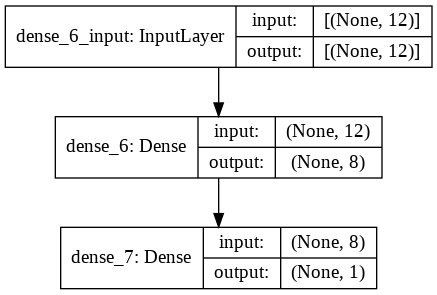

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_dim = 12, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True,to_file = 'model_acc_structure.png')

Epoch 1/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3940 - accuracy: 0.8125 - val_loss: 0.0980 - val_accuracy: 0.9701
Epoch 2/50
960/960 [==============================] - 2s 2ms/step - loss: 0.0814 - accuracy: 0.9786 - val_loss: 0.0488 - val_accuracy: 0.9892
Epoch 3/50
960/960 [==============================] - 2s 2ms/step - loss: 0.0437 - accuracy: 0.9912 - val_loss: 0.0342 - val_accuracy: 0.9921
Epoch 4/50
960/960 [==============================] - 2s 2ms/step - loss: 0.0322 - accuracy: 0.9932 - val_loss: 0.0270 - val_accuracy: 0.9933
Epoch 5/50
960/960 [==============================] - 2s 2ms/step - loss: 0.0245 - accuracy: 0.9945 - val_loss: 0.0230 - val_accuracy: 0.9936
Epoch 6/50
960/960 [==============================] - 2s 2ms/step - loss: 0.0219 - accuracy: 0.9946 - val_loss: 0.0191 - val_accuracy: 0.9954
Epoch 7/50
960/960 [==============================] - 2s 2ms/step - loss: 0.0194 - accuracy: 0.9953 - val_loss: 0.0177 - val_accuracy: 0.9955
Epoch 

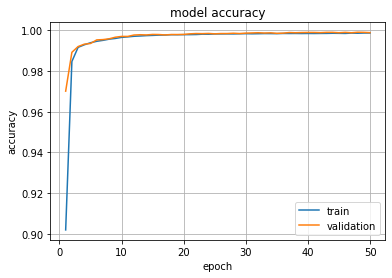

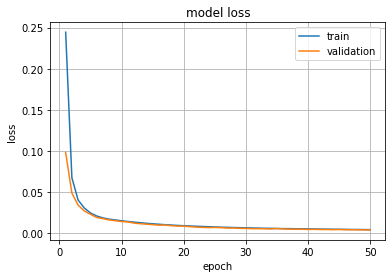

In [ ]:
import matplotlib.pyplot as plt
history = model.fit(X_train_acc, y_train, validation_data=(X_validation_acc, y_validation), epochs=50, batch_size=64)
training_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count,history.history['accuracy'])
plt.plot(epoch_count,history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid(True)
plt.savefig('loss_acc.png')
plt.show()
plt.plot(epoch_count,history.history['loss'])
plt.plot(epoch_count,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid(True)
plt.savefig('accuracy_acc.png')
plt.show()


In [ ]:
y_pred = model.predict(X_test_acc)

In [ ]:
y_pred_bool =(y_pred>0.5)
list(y_pred_bool)
y_pred_bool

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(y_test, y_pred)
print(m.result().numpy())

0.99877834


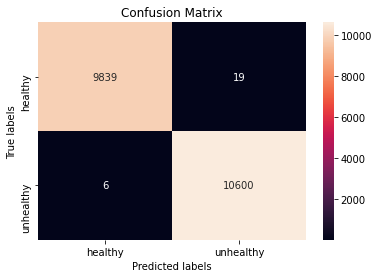

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred_bool)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['healthy', 'unhealthy']); ax.yaxis.set_ticklabels(['healthy', 'unhealthy']);
plt.savefig('confusion_matrix2.png')

In [ ]:
import tensorflow as tf
m = tf.keras.metrics.binary_accuracy(y_validation,y_pred,threshold = 0.5)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9858
           1       1.00      1.00      1.00     10606

    accuracy                           1.00     20464
   macro avg       1.00      1.00      1.00     20464
weighted avg       1.00      1.00      1.00     20464



In [ ]:
X_train_gyro.head()

,knee_gx,knee_gy,knee_gz,back_gx,back_gy,back_gz,chest_gx,chest_gy,chest_gz,lying,sitting,standing
0,-0.499101,-0.097252,0.052144,0.391227,0.029474,-0.312622,-0.028845,-0.237909,-0.005396,0.0,0.0,1.0
1,0.374207,0.240045,-0.303511,-0.213966,0.032209,0.521833,0.697166,-0.395983,-0.976248,1.0,0.0,0.0
2,0.099739,0.469594,-0.060868,1.489539,-0.044385,0.103264,0.228772,0.030648,0.083473,1.0,0.0,0.0
3,0.224497,-0.106621,-0.100754,1.355052,-0.145598,-0.119436,0.814264,0.011951,0.066705,1.0,0.0,0.0
4,-0.399294,-0.097252,-0.278582,0.458470,0.218223,-0.234811,-0.005425,-0.122327,0.101917,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

column_names_to_normalize = ['knee_gx','knee_gy','knee_gz','back_gx', 'back_gy', 'back_gz','chest_gx','chest_gy','chest_gz']
x = X_train_gyro[column_names_to_normalize].values
sc.fit(x)
x_scaled = sc.transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = X_train_gyro.index)
X_train_gyro[column_names_to_normalize] = df_temp
enc=OneHotEncoder()
enc.fit(X_train_gyro.activity.values.reshape(-1,1))
enc_trdf=pd.DataFrame(enc.transform(X_train_gyro.activity.values.reshape(-1,1)).toarray())
X_train_gyro=X_train_gyro.iloc[:,0:9].join(enc_trdf)
X_train_gyro.rename(columns={0:'lying',1:'sitting',2:'standing'},inplace=True)
X_train_gyro.head(10)

,knee_gx,knee_gy,knee_gz,back_gx,back_gy,back_gz,chest_gx,chest_gy,chest_gz,lying,sitting,standing
0,-0.499101,-0.097252,0.052144,0.391227,0.029474,-0.312622,-0.028845,-0.237909,-0.005396,0.0,0.0,1.0
1,0.374207,0.240045,-0.303511,-0.213966,0.032209,0.521833,0.697166,-0.395983,-0.976248,1.0,0.0,0.0
2,0.099739,0.469594,-0.060868,1.489539,-0.044385,0.103264,0.228772,0.030648,0.083473,1.0,0.0,0.0
3,0.224497,-0.106621,-0.100754,1.355052,-0.145598,-0.119436,0.814264,0.011951,0.066705,1.0,0.0,0.0
4,-0.399294,-0.097252,-0.278582,0.458470,0.218223,-0.234811,-0.005425,-0.122327,0.101917,0.0,0.0,1.0
5,0.274401,-0.050405,-0.024305,-0.326039,0.024003,0.274985,0.369290,-0.154622,0.165634,1.0,0.0,0.0
6,0.973047,-0.120676,-0.045910,0.503299,-0.000617,0.052284,1.025042,0.062943,0.006341,1.0,0.0,0.0
7,1.372273,-0.261216,-0.097430,0.503299,-0.110037,-0.165050,1.048461,-0.181818,-0.179781,1.0,0.0,0.0
8,0.623724,-0.137072,0.028877,-0.057064,-0.241341,-0.186515,0.345870,-0.457174,-0.154629,1.0,0.0,0.0
9,0.324304,-0.097252,-0.059206,0.660201,-0.110037,0.285717,-0.145944,0.144530,0.070058,1.0,0.0,0.0


In [ ]:
column_names_to_normalize = ['knee_gx','knee_gy','knee_gz','back_gx', 'back_gy', 'back_gz','chest_gx','chest_gy','chest_gz']
x = X_test_gyro[column_names_to_normalize].values

x_scaled = sc.transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = X_test_gyro.index)
X_test_gyro[column_names_to_normalize] = df_temp
enc_tedf=pd.DataFrame(enc.transform(X_test_gyro.activity.values.reshape(-1,1)).toarray())
X_test_gyro=X_test_gyro.iloc[:,0:9].join(enc_tedf)
X_test_gyro.rename(columns={0:'lying',1:'sitting',2:'standing'},inplace=True)
X_test_gyro.head(10)

,knee_gx,knee_gy,knee_gz,back_gx,back_gy,back_gz,chest_gx,chest_gy,chest_gz,lying,sitting,standing
0,0.099739,-0.193288,-0.148951,1.646441,-0.071740,-0.111387,0.275611,-0.100231,0.237736,1.0,0.0,0.0
1,-1.572022,-0.048063,-0.069177,-0.527770,-0.090888,-0.068457,-0.520659,0.044246,0.054967,0.0,1.0,0.0
2,0.299352,-0.083198,-0.074163,-0.438111,-0.079946,-0.073823,0.322450,-0.095132,0.039876,1.0,0.0,0.0
3,-0.798520,-0.151126,0.045497,0.727445,-0.006088,-0.012111,0.369290,0.064642,0.269594,0.0,0.0,1.0
4,0.648675,-0.111306,-0.122359,-0.213966,-0.014294,0.009354,0.650326,-0.079834,0.108624,1.0,0.0,0.0
5,0.598772,-0.097252,0.027215,0.458470,0.040416,-0.001378,0.720586,-0.006746,-0.007073,1.0,0.0,0.0
6,0.424111,-0.338513,-0.190499,0.122252,0.300289,-0.065774,0.158513,-1.692875,3.757283,0.0,1.0,0.0
7,0.823337,-0.094910,-0.281906,1.108492,-0.531304,-0.103338,0.626907,0.042546,0.023109,1.0,0.0,0.0
8,0.124691,-0.195630,0.298111,1.534369,-0.140127,0.022770,0.228772,0.001753,0.167311,1.0,0.0,0.0
9,0.074787,-0.090225,-0.120698,1.086078,0.078713,0.097898,0.697166,-0.108730,0.179049,1.0,0.0,0.0


In [ ]:
X_validation_gyro.head()

,knee_gx,knee_gy,knee_gz,back_gx,back_gy,back_gz,chest_gx,chest_gy,chest_gz,activity
0,-272.0,14.0,262.0,1520,-255,145,144,-345,240,lying
1,-192.0,11.0,162.0,768,-193,-462,432,-470,244,lying
2,-1264.0,-55.0,343.0,368,-184,-43,144,71,-91,sitting
3,-1216.0,-20.0,603.0,336,-219,53,48,-493,479,sitting
4,-736.0,49.0,268.0,640,-229,180,-80,-118,371,standing


In [ ]:
column_names_to_normalize = ['knee_gx','knee_gy','knee_gz','back_gx', 'back_gy', 'back_gz','chest_gx','chest_gy','chest_gz']
x = X_validation_gyro[column_names_to_normalize].values

x_scaled = sc.transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = X_validation_gyro.index)
X_validation_gyro[column_names_to_normalize] = df_temp
enc_tvdf=pd.DataFrame(enc.transform(X_validation_gyro.activity.values.reshape(-1,1)).toarray())
X_validation_gyro=X_validation_gyro.iloc[:,0:9].join(enc_tvdf)
X_validation_gyro.rename(columns={0:'lying',1:'sitting',2:'standing'},inplace=True)
X_validation_gyro.head(10)

,knee_gx,knee_gy,knee_gz,back_gx,back_gy,back_gz,chest_gx,chest_gy,chest_gz,lying,sitting,standing
0,0.698579,-0.151126,-0.112388,1.556783,-0.099095,0.205223,0.158513,-0.195416,0.133776,1.0,0.0,0.0
1,0.823337,-0.158153,-0.278582,0.503299,0.070506,-1.423440,0.580067,-0.407882,0.140483,1.0,0.0,0.0
2,-0.848424,-0.312747,0.022229,-0.057064,0.095126,-0.299206,0.158513,0.511671,-0.421236,0.0,1.0,0.0
3,-0.773569,-0.230765,0.454334,-0.101893,-0.000617,-0.041625,0.017994,-0.446975,0.534525,0.0,1.0,0.0
4,-0.025019,-0.069144,-0.102416,0.323983,-0.027972,0.299133,-0.169363,0.190422,0.353433,0.0,0.0,1.0
5,0.099739,-0.141757,-0.020981,1.579198,0.136158,0.122046,0.252191,-0.027143,0.172342,1.0,0.0,0.0
6,0.174594,-0.153468,-0.130669,-0.213966,0.095126,0.154244,-0.450400,-0.234509,0.075089,0.0,0.0,1.0
7,0.848289,0.261126,-1.638049,1.153321,2.691117,4.076988,0.720586,-0.873607,0.807839,1.0,0.0,0.0
8,-0.973182,-1.127881,0.763455,-0.124308,0.401502,0.320598,-0.380141,-1.169359,-1.262976,0.0,0.0,1.0
9,-0.773569,-0.048063,-0.290215,-0.012235,-0.309728,-0.014794,0.181932,0.068042,-0.027194,0.0,1.0,0.0


Epoch 1/50
960/960 [==============================] - 3s 2ms/step - loss: 0.6013 - accuracy: 0.6668 - val_loss: 0.4454 - val_accuracy: 0.8032
Epoch 2/50
960/960 [==============================] - 2s 2ms/step - loss: 0.4259 - accuracy: 0.8306 - val_loss: 0.3614 - val_accuracy: 0.8950
Epoch 3/50
960/960 [==============================] - 2s 2ms/step - loss: 0.3504 - accuracy: 0.8936 - val_loss: 0.3076 - val_accuracy: 0.9013
Epoch 4/50
960/960 [==============================] - 2s 2ms/step - loss: 0.3018 - accuracy: 0.8982 - val_loss: 0.2792 - val_accuracy: 0.8972
Epoch 5/50
960/960 [==============================] - 2s 2ms/step - loss: 0.2754 - accuracy: 0.8953 - val_loss: 0.2627 - val_accuracy: 0.8955
Epoch 6/50
960/960 [==============================] - 2s 2ms/step - loss: 0.2597 - accuracy: 0.8967 - val_loss: 0.2522 - val_accuracy: 0.8997
Epoch 7/50
960/960 [==============================] - 2s 2ms/step - loss: 0.2496 - accuracy: 0.8978 - val_loss: 0.2439 - val_accuracy: 0.8978
Epoch 

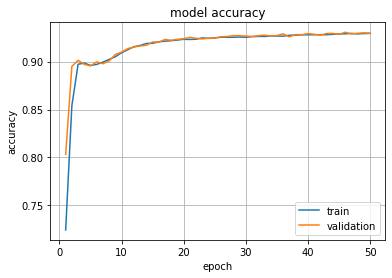

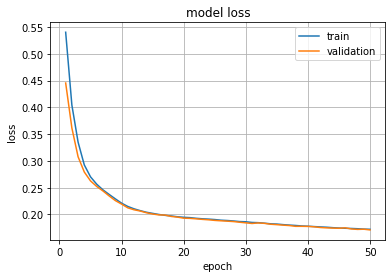

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_dim = 12, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

import matplotlib.pyplot as plt
history = model.fit(X_train_gyro, y_train, validation_data=(X_validation_gyro, y_validation), epochs=50, batch_size=64)
training_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count,history.history['accuracy'])
plt.plot(epoch_count,history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid(True)
plt.savefig('accuracy_gyro.png')
plt.show()
plt.plot(epoch_count,history.history['loss'])
plt.plot(epoch_count,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid(True)
plt.savefig('loss_gyro.png')
plt.show()


In [ ]:
y_pred = model.predict(X_test_gyro)
y_pred_bool =(y_pred>0.5)
list(y_pred_bool)
y_pred_bool
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(y_test, y_pred)
print(m.result().numpy())

0.93183154


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      9858
           1       0.95      0.92      0.93     10606

    accuracy                           0.93     20464
   macro avg       0.93      0.93      0.93     20464
weighted avg       0.93      0.93      0.93     20464



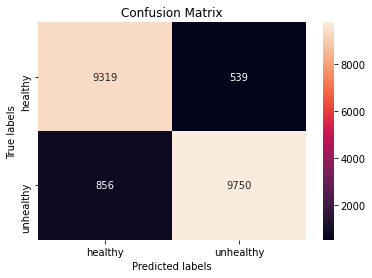

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred_bool)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['healthy', 'unhealthy']); ax.yaxis.set_ticklabels(['healthy', 'unhealthy']);
plt.savefig('confusion_matrix3.png')